[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MaxMitre/ML-AI-for-the-Working-Analyst/blob/main/Semana1/Limpieza_datos_Bosch-numpy-pandas.ipynb)

#Conectarse al Drive del profesor:

- Dar click al enlaces: **contacte al profesor por el link**

- Ir a "compartido conmigo" y dar click derecho sobre la carpeta "Curso-WorkingAnalyst" y seleccionar "Añadir acceso directo a Drive"

- En las opciones, seleccionar "mi unidad"

# Limpieza de datos

Los datos que utlizaremos son proporcionados por la empresa "Bosch". La compañía está interesada en predecir cuando uno de sus productos  presentará fallas internas, esto es posible porque Bosch guarda muchos datos a lo largo de la linea de ensamblaje, datos que incluyen miles de medidas y pruebas efectuadas a los componentes. Esto permitiría a Bosch dar mayor calidad a menos costo a los usuarios finales de sus productos.

(la data se encuentra en https://www.kaggle.com/c/bosch-production-line-performance/overview)



In [ ]:
# DISTINTAS MANERAS DE IMPORTAR
#import numpy
#numpy.array([1,2,3])

#import numpy as np
#np.array([1,2,3])

#from numpy import array
#array([1,2,3])


#from mi_libreria import *

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import RidgeClassifier, LogisticRegression, LogisticRegressionCV, Lasso
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix, roc_auc_score, roc_curve, precision_score

In [ ]:
# Montar nuestro drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Lectura de los datos**

Los datos son medidas que se toman a las partes en la línea de producción. Cada parte tiene un Id único. Se buscará predecir si una parte falla el control de calidad (Se representará como un 'Response' = 1).

Los datos contienen un gran número de características (features). Estos nos dicen la linea de producción, la estación en la línea y la característica. Eg. L3_S36_F3939 nos dice que es una característica medida en la linea 3, estación 36 y número de característica 3939.



In [ ]:
path = '/content/drive/MyDrive/Curso-WorkingAnalyst/semana1/'

In [ ]:
# Limitaremos el número de datos a cargar, solo para que sea mas rápido

df_num = pd.read_csv(path + 'train_numeric.csv.zip', nrows=10_000)
df_cat = pd.read_csv(path + 'train_categorical.csv.zip', nrows=10_000)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,41,42,43,57,59,60,62,63,65,66,68,69,71,72,74,75,77,78,80,81,83,84,86,87,89,90,92,93,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,188,189,190,191,192,193,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,335,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459

Exploremos los datos que acabamos de cargar

In [ ]:
print(f'El DataFrame de caracteristicas numéricas tiene forma {df_num.shape}')
print(f'El DataFrame de características categóricas tiene forma {df_cat.shape}')

El DataFrame de caracteristicas numéricas tiene forma (10000, 970)
El DataFrame de características categóricas tiene forma (10000, 2141)


In [ ]:
df_num.info()
print('----------')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 970 entries, Id to Response
dtypes: float64(968), int64(2)
memory usage: 74.0 MB
----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 2141 entries, Id to L3_S49_F4240
dtypes: float64(1375), int64(1), object(765)
memory usage: 163.3+ MB


In [ ]:
# Solo aplica a los datos numéricos
df_num.describe()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
count,10000.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,5733.000000,...,249.000000,249.000000,249.000000,249.000000,249.000000,501.000000,501.000000,501.000000,501.000000,10000.000000
mean,9959.598500,-0.001898,-0.002599,0.001011,0.000744,-0.001164,0.004127,0.000347,0.002321,-0.000786,...,-0.000008,0.000008,0.000048,0.000189,0.001004,-0.000008,0.000006,0.000062,0.000092,0.005300
std,5722.930873,0.079458,0.091942,0.213640,0.213748,0.094814,0.164772,0.019482,0.104789,0.115022,...,0.000089,0.000089,0.000566,0.001168,0.250502,0.000089,0.000100,0.000967,0.001060,0.072612
min,4.000000,-0.310000,-0.399000,-0.397000,-0.397000,-0.404000,-0.566000,-0.044000,-0.232000,-0.393000,...,-0.001000,0.000000,0.000000,0.000000,-0.250000,-0.001000,0.000000,0.000000,0.000000,0.000000
25%,5035.500000,-0.055000,-0.064000,-0.179000,-0.179000,-0.056000,-0.066000,-0.015000,-0.072000,-0.082000,...,0.000000,0.000000,0.000000,0.000000,-0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9974.500000,0.003000,0.004000,-0.033000,-0.034000,0.031000,0.070000,0.000000,-0.032000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14896.250000,0.056000,0.063000,0.294000,0.294000,0.074000,0.116000,0.015000,0.088000,0.076000,...,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000
max,19923.000000,0.278000,0.280000,0.567000,0.566000,0.292000,0.206000,0.089000,0.488000,0.393000,...,0.000000,0.001000,0.008000,0.014000,0.250000,0.000000,0.002000,0.018000,0.017000,1.000000


In [ ]:
df_num.head()

,Id,L0_S0_F0,L0_S0_F2,L0_S0_F4,L0_S0_F6,L0_S0_F8,L0_S0_F10,L0_S0_F12,L0_S0_F14,L0_S0_F16,...,L3_S50_F4245,L3_S50_F4247,L3_S50_F4249,L3_S50_F4251,L3_S50_F4253,L3_S51_F4256,L3_S51_F4258,L3_S51_F4260,L3_S51_F4262,Response
0,4,0.030,-0.034,-0.197,-0.179,0.118,0.116,-0.015,-0.032,0.020,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7,0.088,0.086,0.003,-0.052,0.161,0.025,-0.015,-0.072,-0.225,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,9,-0.036,-0.064,0.294,0.330,0.074,0.161,0.022,0.128,-0.026,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,11,-0.055,-0.086,0.294,0.330,0.118,0.025,0.030,0.168,-0.169,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [ ]:
# Podemos pedir más o menos de los 5 que son por Default
df_cat.head(10)

,Id,L0_S1_F25,L0_S1_F27,L0_S1_F29,L0_S1_F31,L0_S2_F33,L0_S2_F35,L0_S2_F37,L0_S2_F39,L0_S2_F41,...,L3_S49_F4225,L3_S49_F4227,L3_S49_F4229,L3_S49_F4230,L3_S49_F4232,L3_S49_F4234,L3_S49_F4235,L3_S49_F4237,L3_S49_F4239,L3_S49_F4240
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Localizar elementos en nuestros DataFrame**

*   método .iloc[ ] : Toma solo enteros para buscar la ubicación
*   método .loc[ ] : Puede tomar enteros y cadenas para localizar elementos



In [ ]:
print(df_num.loc[2, 'L0_S0_F0'])
print(df_num.iloc[2, 1])

0.088
0.088


In [ ]:
# Tambien podemos pedir subconjuntos de los datos
df_num.loc[2:4, 'L0_S0_F0':'L0_S0_F4']

,L0_S0_F0,L0_S0_F2,L0_S0_F4
2,0.088,0.086,0.003
3,-0.036,-0.064,0.294
4,-0.055,-0.086,0.294


In [ ]:
# Range de numpy
rango = np.arange(0,5)
for numero in rango:
  print(numero)

0
1
2
3
4


In [ ]:
# Usando el método "iloc" es ligeramente diferente
df_num.iloc[2:5, 1:4]

,L0_S0_F0,L0_S0_F2,L0_S0_F4
2,0.088,0.086,0.003
3,-0.036,-0.064,0.294
4,-0.055,-0.086,0.294


Filtrar un DataFrame por alguna condicion

In [ ]:
# Creemos un DataFrame para pequeñas pruebas
dicti = {'a':[1,2,np.nan,4,5], 'b':[12,np.nan,np.nan,45,5], 'c':['as','ad','af','ac','ag']}
df = pd.DataFrame(dicti)
df

,a,b,c
0,1.0,12.0,as
1,2.0,NaN,ad
2,NaN,NaN,af
3,4.0,45.0,ac
4,5.0,5.0,ag


In [ ]:
# Varios metodos para obtener información, ".isnull()", ".count()", ".mean()", ".sum()"
df.isnull()

,a,b,c
0,False,False,False
1,False,True,False
2,True,True,False
3,False,False,False
4,False,False,False


In [ ]:
# Notemos algo al pedir su info, por ser un DataFrame pequeño
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       4 non-null      float64
 1   b       3 non-null      float64
 2   c       5 non-null      object 
dtypes: float64(2), object(1)
memory usage: 248.0+ bytes


In [ ]:
# Pedimos una condición para que nos devuelva un DataFrame con los datos que la cumple
condicion = df['a'] == 5
df_condicionado = df[condicion]
df_condicionado

,a,b,c
4,5.0,5.0,ag


**Eliminar datos de nuestro DataFrame**: Usando metodo 'drop'

In [ ]:
prueba1 = df.copy()

#prueba1 = prueba1.drop(columns=['b','c'])

prueba1.drop(columns=['b','c'], inplace=True)
prueba1

,a
0,1.0
1,2.0
2,NaN
3,4.0
4,5.0


In [ ]:
prueba2 = df.copy()
prueba2.drop(index=[1, 4], inplace=True)
prueba2

,a,b,c
0,1.0,12.0,as
2,NaN,NaN,af
3,4.0,45.0,ac


**Porcentaje de valores nulos por columna**

Ilustraremos con el siguiente ejemplo utilizando nuestro DataFrame de pruebas

In [ ]:
df

,a,b,c
0,1.0,12.0,as
1,2.0,NaN,ad
2,NaN,NaN,af
3,4.0,45.0,ac
4,5.0,5.0,ag


In [ ]:
# Solo nos quedaremos con las columnas que tienen menos de 15% de valores NaN
null_val = df.isnull().mean()
print(null_val)
null_columns = null_val[null_val > 0.15] 
print(null_columns)

a    0.2
b    0.4
c    0.0
dtype: float64
a    0.2
b    0.4
dtype: float64


In [ ]:
True + True

2

Hagamos esto con nuestros datos

In [ ]:
null_val_num = df_num.isnull().mean()
null_columns_num = null_val_num[null_val_num>0.15]
print(null_columns_num)

L0_S0_F0        0.4267
L0_S0_F2        0.4267
L0_S0_F4        0.4267
L0_S0_F6        0.4267
L0_S0_F8        0.4267
                 ...  
L3_S50_F4253    0.9751
L3_S51_F4256    0.9499
L3_S51_F4258    0.9499
L3_S51_F4260    0.9499
L3_S51_F4262    0.9499
Length: 861, dtype: float64


In [ ]:
null_val = df_cat.isnull().mean()
null_columns = null_val[null_val>0.15]
print(null_columns)

L0_S1_F25       0.9999
L0_S1_F27       0.9999
L0_S1_F29       0.9999
L0_S1_F31       0.9999
L0_S2_F33       0.9999
                 ...  
L3_S49_F4234    1.0000
L3_S49_F4235    1.0000
L3_S49_F4237    1.0000
L3_S49_F4239    1.0000
L3_S49_F4240    1.0000
Length: 2140, dtype: float64


In [ ]:
# Tomando los indices de los que me voy a deshacer
columns_to_drop = null_columns_num.index

columns_to_drop

Index(['L0_S0_F0', 'L0_S0_F2', 'L0_S0_F4', 'L0_S0_F6', 'L0_S0_F8', 'L0_S0_F10',
       'L0_S0_F12', 'L0_S0_F14', 'L0_S0_F16', 'L0_S0_F18',
       ...
       'L3_S50_F4243', 'L3_S50_F4245', 'L3_S50_F4247', 'L3_S50_F4249',
       'L3_S50_F4251', 'L3_S50_F4253', 'L3_S51_F4256', 'L3_S51_F4258',
       'L3_S51_F4260', 'L3_S51_F4262'],
      dtype='object', length=861)

In [ ]:
df_num_drop = df_num.drop(columns=columns_to_drop)
df_num_drop.head()

,Id,L3_S29_F3315,L3_S29_F3318,L3_S29_F3321,L3_S29_F3324,L3_S29_F3327,L3_S29_F3330,L3_S29_F3333,L3_S29_F3336,L3_S29_F3339,...,L3_S33_F3873,L3_S34_F3876,L3_S34_F3878,L3_S34_F3880,L3_S34_F3882,L3_S37_F3944,L3_S37_F3946,L3_S37_F3948,L3_S37_F3950,Response
0,4,0.030,-0.047,-0.119,0.040,-0.067,-0.058,0.044,0.044,0.010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,-0.084,-0.030,-0.127,-0.174,0.145,0.152,-0.006,-0.059,-0.064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,7,0.049,-0.030,-0.099,0.070,0.014,0.004,0.006,0.064,0.040,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,9,-0.084,-0.139,-0.039,-0.207,0.024,0.025,0.038,-0.033,0.014,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,11,-0.147,-0.082,-0.091,-0.137,-0.049,-0.063,-0.163,-0.111,0.053,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [ ]:
# Otra manera de obtener los valores que hay, se obtiene como Serie de Pandas
print("Datos numéricos filtrados:")
print(df_num_drop.dtypes.value_counts())

Datos numéricos filtrados:
float64    107
int64        2
dtype: int64


In [ ]:
# Información de nuestro DataFrame filtrado
df_num_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 109 entries, Id to Response
dtypes: float64(107), int64(2)
memory usage: 8.3 MB


In [ ]:
nulos_desp_drop = df_num_drop.isnull().mean()
print(nulos_desp_drop)

Id              0.0000
L3_S29_F3315    0.0535
L3_S29_F3318    0.0535
L3_S29_F3321    0.0535
L3_S29_F3324    0.0535
                 ...  
L3_S37_F3944    0.0527
L3_S37_F3946    0.0527
L3_S37_F3948    0.0527
L3_S37_F3950    0.0527
Response        0.0000
Length: 109, dtype: float64


Visualmente tambien podemos obtener info de los datos, cuando despues de limpiar el DataFrame aú quedan valores nulos, hay técnicas para reemplazar esos nulos por ciertos datos numéricos.

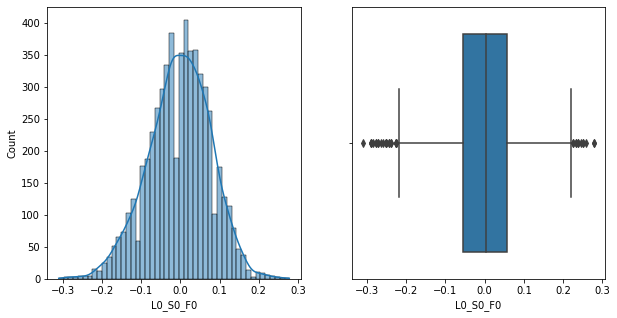

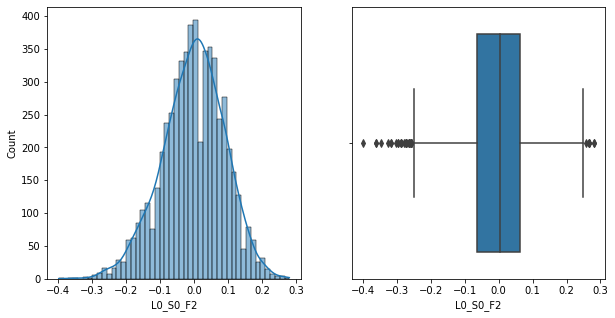

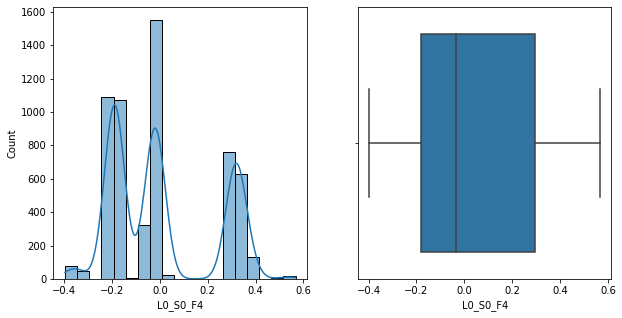

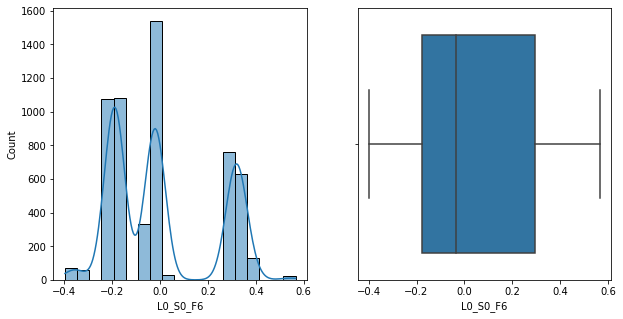

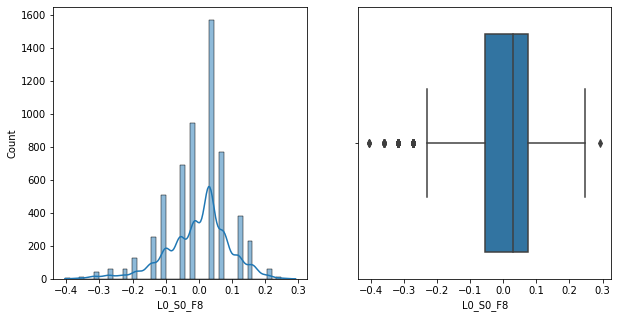

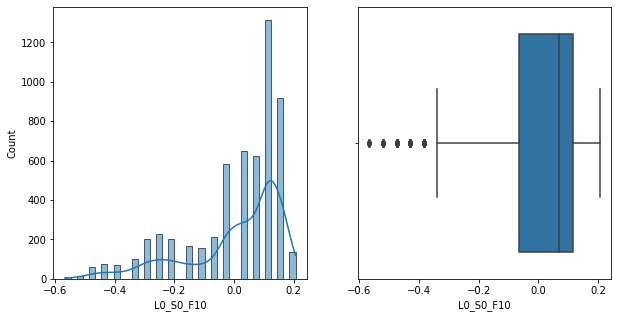

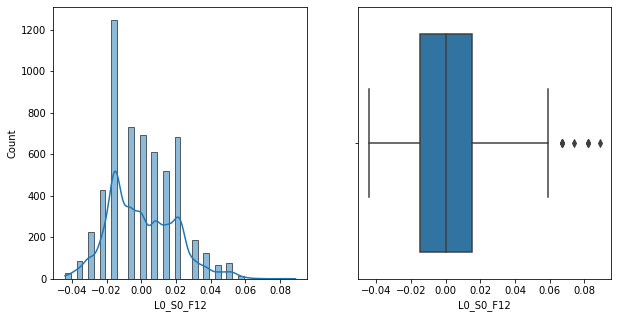

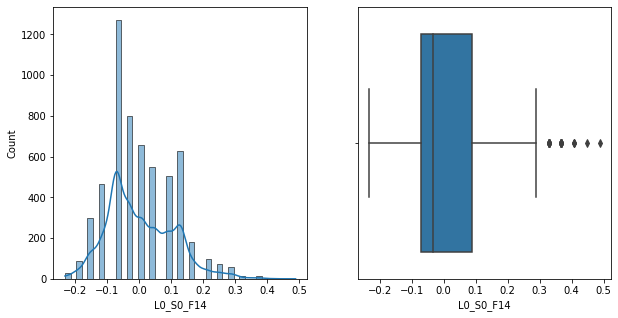

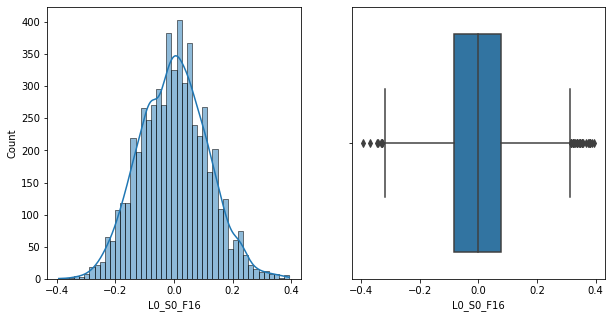

In [ ]:
for col in df_num.columns[1:10]:
  fig, axes = plt.subplots(1, 2, figsize=(10, 5))
  sns.histplot(df_num[col], kde=True, ax=axes[0])
  sns.boxplot(x=df_num[col] ,orient='h' ,ax=axes[1]);

In [ ]:
type(df['a'])

pandas.core.series.Series

In [ ]:
type(df[['a']])

pandas.core.frame.DataFrame

# Limpiar datos categóricos

In [ ]:
df_cat.shape

(10000, 2141)

In [ ]:
null_val = df_cat.isnull().mean()
null_columns_50 = null_val[null_val.values > 0.50]
null_columns_50

L0_S1_F25       0.9999
L0_S1_F27       0.9999
L0_S1_F29       0.9999
L0_S1_F31       0.9999
L0_S2_F33       0.9999
                 ...  
L3_S49_F4234    1.0000
L3_S49_F4235    1.0000
L3_S49_F4237    1.0000
L3_S49_F4239    1.0000
L3_S49_F4240    1.0000
Length: 2077, dtype: float64

In [ ]:
columns_to_drop = null_columns_50.index
df_cat_drop = df_cat.drop(columns=columns_to_drop)
df_cat_drop.head()

,Id,L3_S29_F3317,L3_S29_F3320,L3_S29_F3323,L3_S29_F3326,L3_S29_F3329,L3_S29_F3332,L3_S29_F3335,L3_S29_F3338,L3_S29_F3341,...,L3_S29_F3466,L3_S29_F3469,L3_S29_F3472,L3_S29_F3475,L3_S29_F3478,L3_S29_F3481,L3_S29_F3484,L3_S29_F3487,L3_S29_F3490,L3_S29_F3493
0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,7,T1,T1,T1,T1,T1,T1,T1,T1,T1,...,T1,T1,T1,T1,T1,T1,T1,T1,T1,T1
3,9,T1,T1,T1,T1,T1,T1,T1,T1,T1,...,T1,T1,T1,T1,T1,T1,T1,T1,T1,T1
4,11,T1,T1,T1,T1,T1,T1,T1,T1,T1,...,T1,T1,T1,T1,T1,T1,T1,T1,T1,T1


In [ ]:
df_cat_drop = df_cat_drop.fillna(value='0')

In [ ]:
df_cat_enc = pd.DataFrame()

for col in df_cat_drop.columns:
  if col != 'Id':
    enc = OrdinalEncoder()
    df_cat_enc[col] = enc.fit_transform(df_cat_drop[[col]]).flatten()
  else:
    df_cat_enc['Id'] = df_cat_drop['Id']

In [ ]:
df_cat_enc.head()

,Id,L3_S29_F3317,L3_S29_F3320,L3_S29_F3323,L3_S29_F3326,L3_S29_F3329,L3_S29_F3332,L3_S29_F3335,L3_S29_F3338,L3_S29_F3341,...,L3_S29_F3466,L3_S29_F3469,L3_S29_F3472,L3_S29_F3475,L3_S29_F3478,L3_S29_F3481,L3_S29_F3484,L3_S29_F3487,L3_S29_F3490,L3_S29_F3493
0,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
df_cat_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            10000 non-null  int64  
 1   L3_S29_F3317  10000 non-null  float64
 2   L3_S29_F3320  10000 non-null  float64
 3   L3_S29_F3323  10000 non-null  float64
 4   L3_S29_F3326  10000 non-null  float64
 5   L3_S29_F3329  10000 non-null  float64
 6   L3_S29_F3332  10000 non-null  float64
 7   L3_S29_F3335  10000 non-null  float64
 8   L3_S29_F3338  10000 non-null  float64
 9   L3_S29_F3341  10000 non-null  float64
 10  L3_S29_F3344  10000 non-null  float64
 11  L3_S29_F3347  10000 non-null  float64
 12  L3_S29_F3350  10000 non-null  float64
 13  L3_S29_F3353  10000 non-null  float64
 14  L3_S29_F3356  10000 non-null  float64
 15  L3_S29_F3359  10000 non-null  float64
 16  L3_S29_F3362  10000 non-null  float64
 17  L3_S29_F3364  10000 non-null  float64
 18  L3_S29_F3366  10000 non-nul

Datos para el modelo

In [ ]:
data_1 = df_num_drop.join(df_cat_enc.set_index('Id'), on='Id', how='inner')
data_1.head()

,Id,L3_S29_F3315,L3_S29_F3318,L3_S29_F3321,L3_S29_F3324,L3_S29_F3327,L3_S29_F3330,L3_S29_F3333,L3_S29_F3336,L3_S29_F3339,...,L3_S29_F3466,L3_S29_F3469,L3_S29_F3472,L3_S29_F3475,L3_S29_F3478,L3_S29_F3481,L3_S29_F3484,L3_S29_F3487,L3_S29_F3490,L3_S29_F3493
0,4,0.030,-0.047,-0.119,0.040,-0.067,-0.058,0.044,0.044,0.010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,-0.084,-0.030,-0.127,-0.174,0.145,0.152,-0.006,-0.059,-0.064,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,7,0.049,-0.030,-0.099,0.070,0.014,0.004,0.006,0.064,0.040,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,9,-0.084,-0.139,-0.039,-0.207,0.024,0.025,0.038,-0.033,0.014,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,11,-0.147,-0.082,-0.091,-0.137,-0.049,-0.063,-0.163,-0.111,0.053,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
data_1.shape

(10000, 172)

In [ ]:
data_1.isnull().sum()

Id                0
L3_S29_F3315    535
L3_S29_F3318    535
L3_S29_F3321    535
L3_S29_F3324    535
               ... 
L3_S29_F3481      0
L3_S29_F3484      0
L3_S29_F3487      0
L3_S29_F3490      0
L3_S29_F3493      0
Length: 172, dtype: int64

In [ ]:
data_1.dropna(axis=0, inplace=True)

In [ ]:
data_1.shape

(8938, 172)

In [ ]:
data_1.isnull().sum().sum()

0

In [ ]:
data_1 = df_num_drop.copy()

In [ ]:
data_1.dropna(axis=0, inplace=True)

Datos para entrenamiento

In [ ]:
X = data_1.drop(columns='Response')
y = data_1['Response']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # train_size = 0.8

print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (7150, 108)
X_test shape:  (1788, 108)
y_train shape:  (7150,)
y_test shape:  (1788,)
